# **【はじめに】**

前回に続き、今回も機械学習（machine learning）の古典的なアルゴリズムについて復習を行います。具体的には**（1）ロジスティック回帰分析**、及び**（2）サポートベクトルマシーン（SVM）**について学び直します。

いずれせもある意味、あまりにも「古典的」であり、深層学習（deep learning）の開発・研究が進み、その発展形による社会変革が加速度的に進んでいる現状ではそれそのものを用いるということは余りないモデル、アルゴリズムです。しかし**前者は深層学習において極めて重要な活性化関数（activation function）を理解する際に重要であり、また後者はrule-basedな人工知能（AI）の最高傑作として、その背後にある数理科学も含め、基本は押さえておくべきもの**です。

したがって「次に進むため必ずとおるべき門」であることをよく踏まえた上で以下の演習・課題に取り組んでください。

# **【ロジスティック回帰分析分析（Logistic regression analysis）】**

ロジスティック回帰分析は、いくつかの要因（説明変数）から「2値の結果（目的変数）」が起こる確率を説明・予測することができる統計手法で、多変量解析の手法の１つである。例えば以下の様な場合に利用される。


*   顧客がどのような理由で商品を購入するのか可能性を分析する
*   ある病気になるリスクを、生活習慣などの複数の要因から予測する
*   どのチャネルの広告配信が最も効果的かを調べる

数理科学的にどの様に説明を行うことが出来るのかについては、例えば[こちらを参照する](https://bellcurve.jp/statistics/course/26934.html?srsltid=AfmBOoqg4OhvUzQMWT1-degw5n751zTmg-SqhAJWakZEq9eVwoCOrHFH)と分かりやすい。

大事なことは**目的変数が0か1かである時に、そのまま線形回帰を行うと0以下あるいは1以上の値も出て来てしまうため、ロジスティック変換を行い、シグモイド関数を用いることで0から1の間に予測値を納められる点**にある。なおeは[ネイピア数](https://ja.wikipedia.org/wiki/%E3%83%8D%E3%82%A4%E3%83%94%E3%82%A2%E6%95%B0)という。


In [ ]:
#数理科学的な概説は以上に止め、まずは簡単な事例でロジスティック回帰分析について手を動かしながら学んでみる。
#以下ではまず、乳癌診断結果のデータセット(load_breast_cancer)を用いる。このデータには569人に対する、診断結果を含む30個の説明変数と、それぞれの乳がん診断結果（悪性腫瘍 or 良性腫瘍）の情報が記載されている。これらの説明変数を用いながら、悪性腫瘍か良性腫瘍かを判断する。

from sklearn.datasets import load_breast_cancer

data =load_breast_cancer()
data

In [ ]:
#以上だけではデータの全容が分からないので、前処理を進めていく。

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# scikit-learnより癌のデータを抽出する
# 前処理によって可視化することでようやく全体像がつかめてくる

df_X = pd.DataFrame(data=data.data,columns=data.feature_names)
df_y = pd.DataFrame(data=data.target,columns=['cancer'])
df = pd.concat([df_X,df_y],axis=1)

df

In [ ]:
# いくつかの変数で変数同士の関係性を見てみる。

sns.pairplot(df.iloc[:,25:], hue='cancer')
plt.show()

**【課題】**


別の番号を振られている患者（連続した一定の範囲）を指定して、同様に可視化をし、癌の罹患状況について考察せよ。

In [ ]:
#以上の準備を前提として、次の解析条件でロジスティック回帰分析を実施する。
#(1)説明変数:30個の変数全て使用、（2）目的変数：cancer(0:悪性, 1:良性）、（3）50%のデータを学習データに、残り50%をテストデータとする

# 説明変数Xと予測したい変数Yを準備する（yは0,1のカテゴリ変数に変換）
X = df.drop('cancer',axis=1)
y = df.loc[:,'cancer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

In [ ]:
# 説明変数は標準化しておく(あとで回帰係数を比較するため。このあたりは前回の講義を良く復習しておくこと。)

from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

In [ ]:
# モデルの構築と学習

lr = LogisticRegression()
lr.fit(X_train, y_train)

In [ ]:
# 訓練データ,テストデータに対する予測

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# 最初の１０サンプルだけ表示してみる

print(y_pred_train[:10])
print(y_pred_test[:10])

**【課題】**

任意の患者番号（連続する複数）を指定し、サンプルを示せ。

In [ ]:
# 訓練データを用いた予測性能を評価してみる。

print('accuracy：', accuracy_score(y_true=y_train, y_pred=y_pred_train))
print('precision：', precision_score(y_true=y_train, y_pred=y_pred_train))
print('recall：', recall_score(y_true=y_train, y_pred=y_pred_train))
print('f1 score：', f1_score(y_true=y_train, y_pred=y_pred_train))
print('confusion matrix = \n', confusion_matrix(y_true=y_train, y_pred=y_pred_train))

**【課題】**

上記で示した複数の評価指数（metrics）について、それぞれがどの様な意味を持っているのかを調べ、説明せよ。

In [ ]:
# テストデータを用いた予測性能を評価する。

print('accuracy：', accuracy_score(y_true=y_test, y_pred=y_pred_test))
print('precision：', precision_score(y_true=y_test, y_pred=y_pred_test))
print('recall：', recall_score(y_true=y_test, y_pred=y_pred_test))
print('f1 score：', f1_score(y_true=y_test, y_pred=y_pred_test))
print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=y_pred_test))

In [ ]:
# ROC曲線の描画を行い、AUCの計算（ROC曲線の下側の面積）をしてみる

from sklearn.metrics import roc_curve, auc

y_score = lr.predict_proba(X_test)[:, 1] # 検証データがクラス1に属する確率
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_score)

plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle='--', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='ideal')
plt.legend()
plt.title('ROC curve of test sample',fontsize=15)
plt.xlabel('false positive rate',fontsize=15)
plt.ylabel('true positive rate',fontsize=15)
plt.show()

**【課題】**

上記で示されるテストデータに基づくROC曲線について解釈を述べよ。またそれに基づいて、このモデル構築は成功であったと言えるかどうか？判断せよ。

In [ ]:
#回帰係数の高い10個の変数を示してみる。

import numpy as np

# 回帰係数を格納したpandasDataFrameの表示

df_coef =  pd.DataFrame({'coefficient':lr.coef_.flatten()}, index=X.columns)
df_coef['coef_abs'] = abs(df_coef['coefficient'])
df_coef.sort_values(by='coef_abs', ascending=True,inplace=True)
df_coef = df_coef.iloc[-10:,:]

# グラフの作成
x_pos = np.arange(len(df_coef))

fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(1, 1, 1)
ax1.barh(x_pos, df_coef['coefficient'], color='b')
ax1.set_title('coefficient of variables',fontsize=18)
ax1.set_yticks(x_pos)
ax1.set_yticks(np.arange(-1,len(df_coef.index))+0.5, minor=True)
ax1.set_yticklabels(df_coef.index, fontsize=14)
ax1.set_xticks(np.arange(-10,11,2)/10)
ax1.set_xticklabels(np.arange(-10,11,2)/10,fontsize=12)
ax1.grid(which='minor',axis='y',color='black',linestyle='-', linewidth=1)
ax1.grid(which='major',axis='x',linestyle='--', linewidth=1)
plt.show()

**【課題】**

上記に基づき、最も影響が強い変数は何であると考えられるか？説明せよ。

**【課題】**

上記のモデル構築ではハイパーパラメータのチューニングは度外視した。（1）ロジスティック回帰分析のsklearn上のライブラリーについて、どの様なハイパーパラメータがあるのかについてまずは調べた上で、（2）実際にチューニングを試み、結果を考察せよ。

**【課題】**

上記では二項分類としてのロジスティック回帰分析を実装したが、これとは別にロジスティック回帰分析は多項分類にも用いることが出来る。

そこで0～9までのデジタル数字のデータを用いて（digits = load_digits()）、多項分離をロジスティック回帰分析で実装するモデルを構築し、性能を評価せよ。

# **【補論：活性化関数（activation function）】**

活性化関数（activation function）は入力信号の総和がどのように活性化するかを決定する役割を持つ。深層学習（deep learning）においては極めて重要な役割を持つが、ロジスティック回帰分析で登場するシグモイド関数とその周辺が活性化関数として用いられることに留意して学習していきたい。以下に例を示す。


In [ ]:
#ステップ関数

import numpy as np
import matplotlib.pylab as plt

def step_function(x):
  y = x > 0
  # Replace np.int with the built-in int
  return y.astype(int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [ ]:
#シグモイド関数

import numpy as np
import matplotlib.pylab as plt

def sigmoid(x):
  return 1 / (1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [ ]:
#ReLU関数

import numpy as np
import matplotlib.pylab as plt

def relu(x):
  return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.show()

In [ ]:
#恒等関数

import numpy as np
import matplotlib.pylab as plt

def koutou(a):
  return a

x = np.arange(-5, 5, 0.1)
y = koutou(x)
plt.plot(x, y)
plt.show()

In [ ]:
#ソフトマックス関数

import numpy as np
import matplotlib.pylab as plt

def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  return y

x = np.arange(-5, 5, 0.1)
y = softmax(x)
plt.plot(x, y)
plt.show()

# **【サポートベクトルマシーン（Support vector machine (SVM)】**

サポートベクトルマシーンとは教師あり学習を用いるパターン認識モデルの1つであり、分類や回帰へ適用できるアルゴリズムである。具体的には、**線形入力素子を利用して2クラスのパターン識別器を構成する手法であり、訓練サンプルから、各データ点との距離が最大となるマージン最大化超平面を求めるという基準（超平面分離定理）で線形入力素子のパラメータを学習**する。

下記は2クラスのサンプルで学習したSVMの最大マージン超平面とマージンの例である。マージン上のサンプルは**サポートベクター**と呼ばれる。


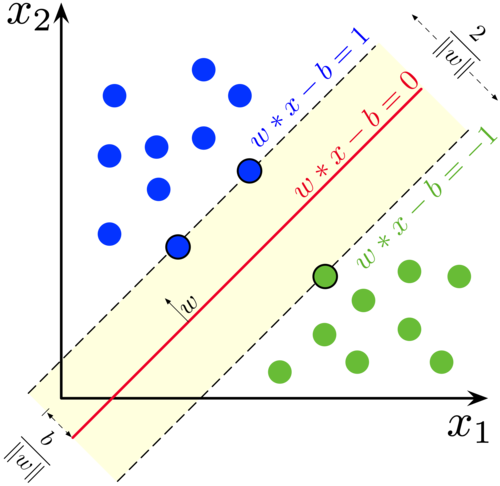



サポートベクトルマシーンを支える数理科学を理解しておくことがアカデミアの上では必要だが、実装と言う観点では二の次とされることが多いのも事実である。

しかし理系の学生諸君は特に原理的なところ（特にカーネル法、双対問題など）についても理解しておくことが重要ではある。参考として以下のURLを掲げておきたい。



*   [サポートベクターマシンを図でやさしく理解する(理論+実装)【機械学習入門34】](https://datawokagaku.com/svm/)
*   [SVMをはじめから丁寧に](https://zenn.dev/ama_c/articles/11a53b9f5aecdf)


*   [機械学習の定番「サポートベクターマシン（SVM）」を高校生でもわかるよう解説](https://qiita.com/c60evaporator/items/8864f7c1384a3c6e9bd9)







In [ ]:
#以上で概要をつかんだことを前提としつつ、まずは簡単なSVMのモデル構築を行ってみる。
#前回の講義でも用いた有名なアヤメのデータセットを用いて、分類問題を解いてみる。

from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

print(iris_df.head())

In [ ]:
#kのデータセットにはSetosa、Virginica、Virginicaの3品種に関するデータが50個ずつ入っており、正解データは以下で示すことが出来る。

print(iris.target)

In [ ]:
#今回はsetosa、versicolorのpetal lengthとpetal widthのデータを用いて分類を行ってみる。
#まずは必要なライブラリーをダウンロードし、次にデータセットを前処理する。

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris

!pip install mglearn
import mglearn


In [ ]:
iris = load_iris()
X = iris.data[:100, 2:]
Y = iris.target[:100]
print(X.shape)
print(Y.shape)

In [ ]:
#抽出したデータを描画してみる。まずはこの様に可視化するのが基本中の基本。

mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
plt.legend(['setosa', 'versicolor'], loc='best')
plt.show()

In [ ]:
#上記の可視化により、明らかに線形分離を、単純な形で出来ることが分かった。
#そこで早速SVMでモデル構築をし、実装してみることにする。

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, random_state=0)
svm = LinearSVC()
svm.fit(X_train, Y_train)

In [ ]:
#以下で可視化をし、どの様なモデルになったのかを見てみる。

plt.figure(figsize=(10, 6))
mglearn.plots.plot_2d_separator(svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(['setosa', 'versicolor'], loc='best')
plt.show()

In [ ]:
#以上はSVMを持ち出すまでもない事例であった。
#そこで対象が入り組んでしまっている、いわゆるソフトマージンの例についてモデル構築を次に行ってみる。

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
import mglearn

iris = load_iris()

X = iris.data[50:, 2:]
Y = iris.target[50:] - 1

mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
plt.legend(['versicolor', 'virginica'], loc='best')
plt.show()

In [ ]:
#上図で明らかなのは、これについて線形分離をすることが不可能であるということ。
#そこで線形SVMを用いて、ソフトマージンを導出してみる。

def make_separate(model):
    mglearn.plots.plot_2d_separator(svm, X)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    plt.legend(['setosa', 'versicolor'], loc='best')
    plt.show()


In [ ]:
#ハイパーパラメータCを0.1にしてみる。C値が高い場合、モデルは訓練データに対してより厳密にフィットしようと試み、結果として複雑なモデルが生成される。

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, random_state=0)
svm = LinearSVC(C=0.1)
svm.fit(X_train, Y_train)
make_separate(svm)
print(svm.score(X_test, Y_test))

**【課題】**

C値を100に設定し、同様に演算の上、描画せよ。

In [ ]:
#次に線形分離が不可能な問題について、カーネル法を用いて分類してみる。
#なおカーネル法についてはこちらから学習すること。→　https://qiita.com/renesisu727/items/1c6014c909202ff089f3

#まずはデータセットを描画する。

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

moons = make_moons(n_samples=300, noise=0.2, random_state=0)

X = moons[0]
Y = moons[1]
plt.figure(figsize=(12, 8))
mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
plt.plot()
plt.show()

In [ ]:
#学習データとテストデータに分割しておく。

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, random_state=0)

In [ ]:
#モデルを実装する。

karnel_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='poly', degree=3, coef0=1))
])

karnel_svm.fit(X_train, Y_train)

**【課題】**

上記のモデル構築でハイパーパラメータとして入力した「poly」及び「degree=3」とはどの様な意味なのかを調べて答えよ。

In [ ]:
#上記のモデルを早速図示してみる。

def plot_decision_function(model):
    _x0 = np.linspace(-1.7, 2.7, 100)
    _x1 = np.linspace(-1.5, 1.7, 100)
    x0, x1 = np.meshgrid(_x0, _x1)
    X = np.hstack((x0.ravel().reshape(-1, 1), x1.ravel().reshape(-1, 1)))
    y_decision = model.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_decision, levels=[y_decision.min(), 0, y_decision.max()], alpha=0.3)

def plot_dataset(x, y):
    plt.plot(x[:, 0][y == 0], x[:, 1][y == 0], 'bo', ms=15)
    plt.plot(x[:, 0][y == 1], x[:, 1][y == 1], 'r^', ms=15)
    plt.xlabel('$x_1$', fontsize=20)
    plt.ylabel('$x_2$', fontsize=20, rotation=0)

plt.figure(figsize=(12, 8))
plot_decision_function(karnel_svm)
plot_dataset(X, Y)
plt.show()

# **【統合課題】**

前回と今回の講義で学んだことを踏まえ、「アヤメのデータセット」を用いつつ、2項分類問題を任意のアヤメの種類について設定した上で、（1）k-近傍法、（2）ロジスティック回帰分析、（3）SVM、のそれぞれでモデル構築を行え。結果について比較検討せよ。